__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

__среднее арифметическое__ (или __выборочное среднее__) считаем по формуле:

$$\overline{x} = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m x_i.$$

__Смещенную дисперсию случайной__ считаем по формуле:

$$\sigma^2 = \dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

__среднее квадратическое отклонение__ считаем по формуле:

$$\sigma = \sqrt{\dfrac{1}{m} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2}.$$

__Несмещенную дисперсию случайной__ считаем по формуле:

$$\sigma^2 = \dfrac{1}{m-1} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2.$$

__среднее квадратическое отклонение__ считаем по формуле:

$$\sigma = \sqrt{\dfrac{1}{m-1} \displaystyle\sum_{i = 1}^m (x_i - \overline{x})^2}.$$

In [26]:
import numpy as np
import math

salary = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
salary_mean = sum(salary)/len(salary)
summa = 0
for i in salary:
    summa += (i - salary_mean)**2
    
salary_var_bias = summa/len(salary)

salary_std_bias = math.sqrt(salary_var_1)

salary_var_not_bias = summa/(len(salary)-1)

salary_std_not_bias = math.sqrt(salary_var_not_bias)

print(f'Среднее значение рассчетное: {salary_mean}')
print(f'Смещенная дисперсия рассчетное: {salary_var_bias}')
print(f'Среднее квадратическое отклонение рассчетное: {salary_std_bias}')
print(f'Несмещенная дисперсия рассчетное: {salary_var_not_bias}')
print(f'Среднее квадратическое рассчетное: {salary_std_not_bias}')

print('\nПроверка')
print(f'Среднее значение с использованием статистической функции {np.mean(salary)}')
print(f'Смещенная дисперсия с использованием статистической функции {np.var(salary)}')
print(f'Среднее квадратическое отклонение с использованием статистической функции {np.std(salary)}')
print(f'Несмещенная дисперсия с использованием статистической функции {np.var(salary, ddof=1)}')
print(f'Среднее квадратическое отклонение с использованием статистической функции {np.std(salary, ddof=1)}')

Среднее значение рассчетное: 65.3
Смещенная дисперсия рассчетное: 950.11
Среднее квадратическое отклонение рассчетное: 30.823854398825596
Несмещенная дисперсия рассчетное: 1000.1157894736842
Среднее квадратическое рассчетное: 31.624607341019814

Проверка
Среднее значение с использованием статистической функции 65.3
Смещенная дисперсия с использованием статистической функции 950.11
Среднее квадратическое отклонение с использованием статистической функции 30.823854398825596
Несмещенная дисперсия с использованием статистической функции 1000.1157894736842
Среднее квадратическое отклонение с использованием статистической функции 31.624607341019814


__Задача 2__

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

первый и третий квантиль найдем с помощью встроенной функции quantile()  
далее найдем интерквартильный размах:
$IQR = Q3-Q1$
Далее, найдем «Усы» по формуле  
$\left[ Q1 - 1.5 \times IQR, \text{ } Q3 + 1.5 \times IQR \right],$  
где $IQR$ — интерквартильное расстояние.  
Построим boxplot, а потом проверим каждый элемент в массиве salary на присутствие в интервале "Усов".

первый квантиль: 42.0, третий квантиль: 81.0
Интерквартильный размах: 39.0
Усы: (-16.5, 139.5)
Из рисунка boxplot видно, что выбросом является значение зарплаты 150

Проверка
Т.к. у нас нижня граница получилась отрицательной,
а отрицательных з/п нет, то проверим только превышение верхнего порога
значение зарплаты 150, больше верхнего значения порога 139.5


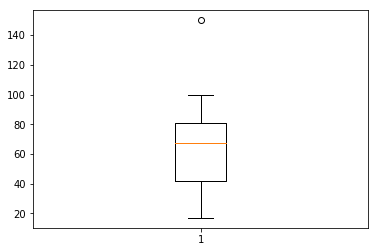

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline

q1, q3 = np.quantile(salary, [0.25, 0.75])
print(f'первый квантиль: {q1}, третий квантиль: {q3}')

iqr = q3 - q1
print(f'Интерквартильный размах: {iqr}')

boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
print(f'Усы: {boxplot_range}')
plt.boxplot(salary);
print('Из рисунка boxplot видно, что выбросом является значение зарплаты 150')

print('\nПроверка')
print('Т.к. у нас нижня граница получилась отрицательной,\n'
      'а отрицательных з/п нет, то проверим только превышение верхнего порога')
for i in salary:
    if i > boxplot_range[1]:
        print(f'значение зарплаты {i}, больше верхнего значения порога {boxplot_range[1]}')

__Задача 3__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Задача решается по теореме Байеса
Т.к. на факультет А и В потупило одинаковое количество людей, а на факультет С в 2 раза больше,  
то вероятность поступления на факультеты равна:
$$P(A) = \frac{1}{4} $$ 

$$P(B) = \frac{1}{4} $$

$$P(C) = \frac{2}{4} $$

Далее найдем полную вероятность того, что студенты всех факультетов сдали сессию по формуле:
$$P(сдал\;сессию) = {P(A|сдал\;сессию)*P(A) + P(B|сдал\;сессию)*P(B) + P(B|сдал\;сессию)*P(B)}$$ 
Подставим ее в формулу Байесса, для каждого варианта
$$P(A|сдал\;сессию) = \frac{P(A|сдал\;сессию)*P(A)}{P(сдал\;сессию)} $$  
$$P(B|сдал\;сессию) = \frac{P(B|сдал\;сессию)*P(B)}{P(сдал\;сессию)} $$  
$$P(C|сдал\;сессию) = \frac{P(C|сдал\;сессию)*P(C)}{P(сдал\;сессию)} $$  

In [6]:
p_full = 0.25*0.8 + 0.25*0.7 + 0.5*0.9
p_full

0.825

In [8]:
p_A = 0.25*0.8/p_full
p_B = 0.25*0.7/p_full
p_C = 0.5*0.9/p_full
print(f'Вероятность того, что студент учится на факультете А: {p_A}')
print(f'Вероятность того, что студент учится на факультете B: {p_B}')
print(f'Вероятность того, что студент учится на факультете C: {p_C}')

Вероятность того, что студент учится на факультете А: 0.24242424242424246
Вероятность того, что студент учится на факультете B: 0.21212121212121213
Вероятность того, что студент учится на факультете C: 0.5454545454545455


In [9]:
# Проверка
p_A + p_B + p_C

1.0